# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [6]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

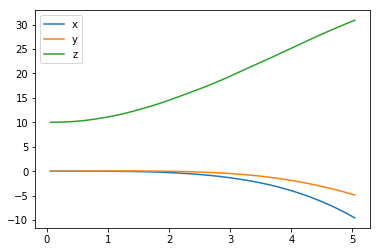

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

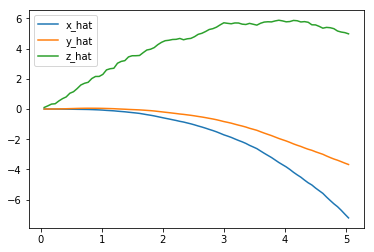

In [8]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

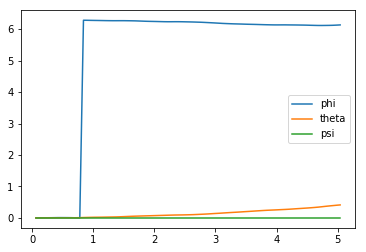

In [9]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

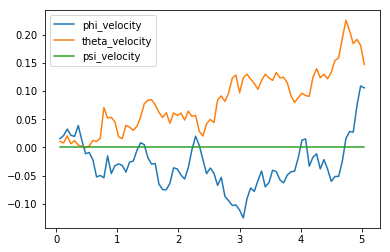

In [10]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

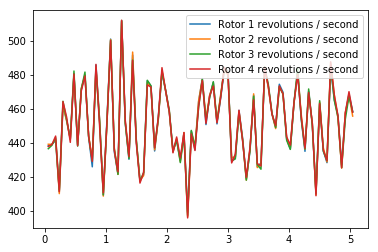

In [11]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [12]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-9.56469483 -4.87751051 30.89027772  6.13283457  0.41299098  0.        ]
[-7.2167056  -3.67660241  4.98356963]
[0.1057067  0.14702291 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [13]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.610 (best =   0.676), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [12]:
import sys
import numpy as np
import pandas as pd
from agents.DDPGAgent import DDPG
from task import Task
from collections import deque
import math
import matplotlib.pyplot as plt
from IPython.display import Image

# performace vars 
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])

num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)

# setting up noise process values
mu = np.array([0])
theta = np.array([0.15])
sigma = np.array([0.2])

# setting up algorithm parameters
gamma = np.array([0.99])  # discount factor
tau = np.array([0.01])  # for soft update of target parameters

# training batches
batches = np.array([64])

# logs
reward_log_file = 'reward_log.csv'
perform_log_file = 'perform_log.csv'

# log path
path = 'reward_logs/'
        
def perform(save = False, learn=True):
    
    # initialize rewards
    best_avg_reward = -math.inf
    samp_rewards = deque(maxlen=30)
    
    # log columns
    perform_cols = ['time', 'x', 'y', 'z', 'x_velocity',
              'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
              'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 
              'rotor_speed4']
    reward_cols = ['Episode', 'Reward'] 

    # dataframes init
    reward_log = pd.DataFrame(index=None, columns=reward_cols) 
    perform_log = pd.DataFrame(index=None, columns=perform_cols)

    # logs
    reward_log_file = 'reward_log.csv'
    perform_log_file = 'perform_log.csv'
    
    # performace / training loop
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        samp_reward = 0
        while True:
            action = agent.act(state, learn)
            next_state, reward, done = task.step(action)
            if learn:
                agent.step(action, reward, next_state, done, save)
            else:
                perform_log = perform_log.append(pd.DataFrame(data=[[task.sim.time,
                                                                 task.sim.pose[0],
                                                                 task.sim.pose[1],
                                                                 task.sim.pose[2],
                                                                 task.sim.v[0],
                                                                 task.sim.v[1],
                                                                 task.sim.v[2],
                                                                 task.sim.angular_v[0],
                                                                 task.sim.angular_v[1],
                                                                 task.sim.angular_v[2],
                                                                 action[0],
                                                                 action[1],
                                                                 action[2],
                                                                 action[3]]],
                                                      columns=perform_cols), ignore_index=True)
            samp_reward += reward
            state = next_state
            if done:
                samp_rewards.append(samp_reward)
                break
        # get average reward 
        avg_reward = np.mean(samp_rewards)
        # update best average reward
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
            save = True                
        elif avg_reward < best_avg_reward:
            save = False
        #monitor progress
        if learn:
            reward_log = reward_log.append(pd.DataFrame(data=[[i_episode, avg_reward]],
                                                      columns=reward_cols), ignore_index=True)
        print("\rEpisode {}/{} Avg reward {} || Best avg reward {}".format(i_episode,
              num_episodes, round(avg_reward,3), round(best_avg_reward,3)), end="")
        sys.stdout.flush()
    # convert data frame to csv - output results
    if learn:
        reward_log.to_csv(path + reward_log_file,  index=False)
    else:
        perform_log.to_csv(path + perform_log_file,  index=False)

In [23]:
# plot functions
def plot_rewards(path, fl, m, th, s, g, ta, b):
    data = pd.read_csv(path + fl)
    x, y = np.array(data['Episode']), np.array(data['Reward'])
    plt.plot(x, y, label='m={} th={} s={} g={} t={} b={}'.format(m, th, s, g, ta, b))
    plt.legend()
    plt.title('mu - theta - sigma')
    plt.title('gamma - ', loc='left')
    plt.title(' - tau - batch', loc='right')
    
def plot_q_pos(path, fl):
    data = pd.read_csv(path + fl)
    t, x, y, z = np.array(data['time']), np.array(data['x']), np.array(data['y']), np.array(data['z'])
    plt.plot(t, x, label='x')
    plt.plot(t, y, label='y')
    plt.plot(t, z, label='z')
    plt.legend()
    plt.title('Position of quadcopter')
    
def plot_q_v(path, fl):
    data = pd.read_csv(path + fl)
    t, xv, yv, zv = np.array(data['time']), np.array(data['x_velocity']), np.array(data['y_velocity']), np.array(data['z_velocity'])
    plt.plot(t, xv, label='x-velo')
    plt.plot(t, yv, label='y-velo')
    plt.plot(t, zv, label='z-velo')
    plt.legend()
    plt.title('Velocity of quadcopter')
    
def plot_q_va(path, fl):
    data = pd.read_csv(path + fl)
    t, xav, yav, zav = np.array(data['time']), np.array(data['phi_velocity']), np.array(data['theta_velocity']), np.array(data['psi_velocity'])
    plt.plot(t, xav, label='phi-avelo')
    plt.plot(t, yav, label='theta-avelo')
    plt.plot(t, zav, label='psi-avelo')
    plt.legend()
    plt.title('Angular velocity of quadcopter')

def plot_q_r(path, fl):
    data = pd.read_csv(path + fl)
    t, r1, r2, r3, r4 = np.array(data['time']), np.array(data['rotor_speed1']), np.array(data['rotor_speed2']), np.array(data['rotor_speed3']), np.array(data['rotor_speed4'])
    plt.plot(t, r1, label='r1_rps')
    plt.plot(t, r2, label='r2_rps')
    plt.plot(t, r3, label='r3_rps')
    plt.plot(t, r4, label='r4_rps')
    plt.legend()
    plt.title('Rotors speed')

## Training agent and plotting rewards


 
Parameters: mu=0; theta=0.15; sigma=0.2, gamma=0.99, tau=0.01, batch=64
Episode 500/500 Avg reward 31.586 || Best avg reward 31.643

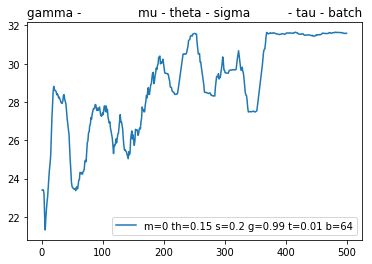

In [13]:
# training agent with predefined parameters to get best results
for m, th, s, g, ta, b in zip(mu, theta, sigma, gamma, tau, batches):    
    print('\n \nParameters: mu={}; theta={}; sigma={}, gamma={}, tau={}, batch={}'.format(m, th, s, g, ta, b))
    agent = DDPG(task, m, th, s, g, ta, b)
    result = perform(learn=True)
    # plotting
    plot_rewards(path, reward_log_file, m, th, s, g, ta, b)
    m, th, s, g, ta, b = m, th, s, g, ta, b

In [15]:
# demoing model within 10 episodes
print("\n \nDemo performance: ")
num_episodes = 10
runtime = 5.
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task, m, th, s, g, ta)
print('Parameters: m={} th={} s={} g={} t={}'.format(m, th, s, g, ta))
result = perform(learn=False)


 
Demo performance: 
Parameters: m=0 th=0.15 s=0.2 g=0.99 t=0.01
Episode 10/10 Avg reward 31.916 || Best avg reward 31.916

## Performance demo

In [16]:
# demoing performance   
print("\n \nDemo simulation: ")
num_episodes = 1
runtime = 5.
#init_pose = np.array([0., 0., 10., 0., 0., 0.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task, m, th, s, g, ta)
print('Parameters: m={} th={} s={} g={} t={}'.format(m, th, s, g, ta))
result = perform(learn=False)


 
Demo simulation: 
Parameters: m=0 th=0.15 s=0.2 g=0.99 t=0.01
Episode 1/1 Avg reward 31.916 || Best avg reward 31.916

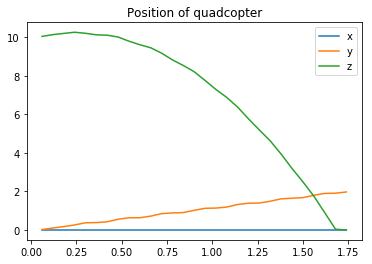

In [17]:
plot_q_pos(path, perform_log_file)

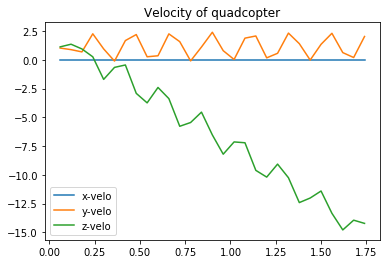

In [18]:
plot_q_v(path, perform_log_file)

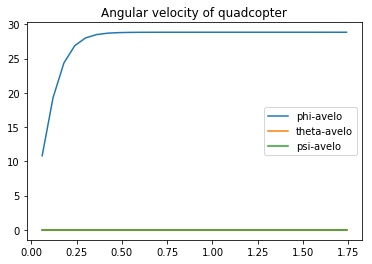

In [19]:
plot_q_va(path, perform_log_file)

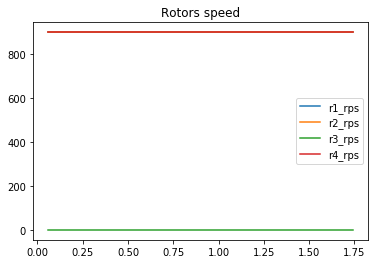

In [24]:
plot_q_r(path, perform_log_file)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: Task.py hasn't been changed drastically from template provided in this lesson, except reward function.
I took first the reward function, which was provided within the lesson, having linear function inside: 1.-.1*error. And I was doing all my learning on that reward function, though changed the coefficient to decrease the penalty/ increase reward. To my observation, such change positively affected training.
After while I decided to put reciprocal function in place: 1/(error+1). Please see below graphics.
To my view agent should have been learned better if approaches to less error so the reward increases. According to my observations, reciprocal function worked better than linear.

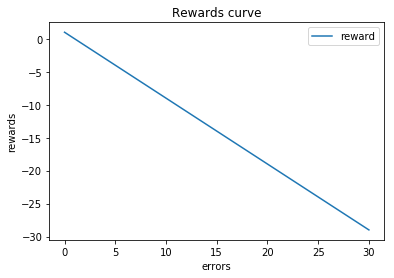

In [50]:
#reciprocal function
Image("plots/reward_curve_lin.png")

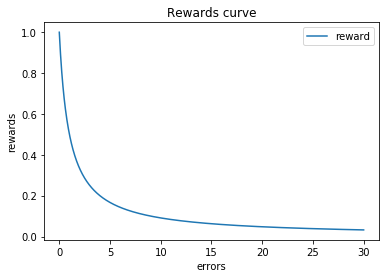

In [51]:
#reciprocal function
Image("plots/reward_curve.png")

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:<br>
Because of better understanding of Deep Q-Learning (thanks to course examples and miniproject) I have started approaching Q-Copter task with Q-Learning algorithms and after 5 hours realized that this is time-consuming and useless exercise. To discretize continuous space for hypersensitive machine to operate – means to waste the machine performance and the machine itself.<br>
In order to work in continuous space I have explored the provided Actor Critic models given in this lesson and Project description. I put models together and started tweaking parameters. Many hours were spent to understand how all this works and find parameters that at least good to consider.<br>
So here I present first results, providing with my exploration steps to find final choices of hyperparameters.
Basic exploration was to iterate learning algorithm through array of parameters to find best ones. Below I am attaching images with different attempts, which specify hyperparameters. Final choices are listed in above main learning function.<br>
I have used Keras models provided in this project Actor Critic examples, maintaining that architecture. And I found it tuned well to fit the goal, though tried different batches sizes, unit sizes, additional layers, Dropout, deleting layers. 
Also, I tried various buffer sizes from 100k to 10000k and found out that it should not be really big if to train model. Given this, 200k buffer size was chosen for 10 seconds of runtime.<br>
As mentioned in question 1, I have changed the reward function. Below I present couple of charts with linear function and reciprocal function rewards results. These charts reflect parameters selection path.

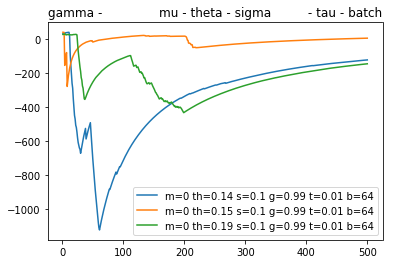

In [52]:
#theta alterations with: run=10, reward=1.-.1*error
Image("plots/theta-_error-0.1_run-10_1.png")

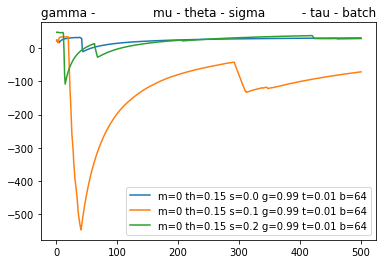

In [53]:
#sigma alterations with: run=10, reward=1.-.1*error
Image("plots/sigma-_error-0.1_run-10_2.png")

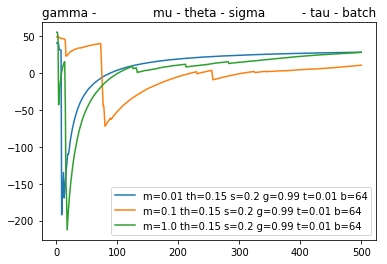

In [54]:
#mu alterations with: run=10, reward=1.-.1*error
Image("plots/mu_error-0.1_run-10.png")

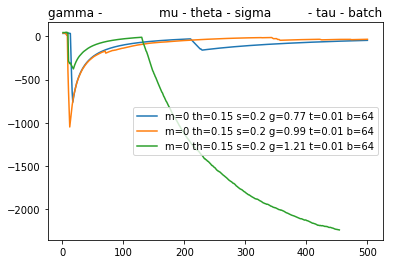

In [55]:
#gamma alterations with: run=10, reward=1.-.1*error
Image("plots/gamma_error-0.1_run-10.png")

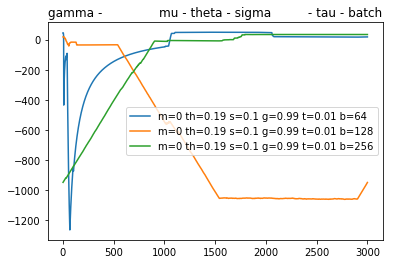

In [56]:
#batches results with: buffer=1000k run=10, reward=1.-.1*error
Image("plots/batches_buff-1000k_error-0.1_run-10.png")

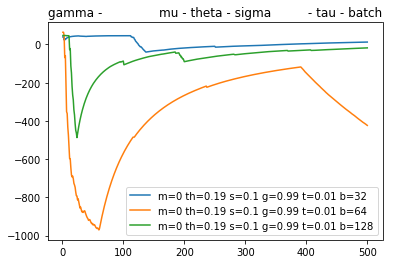

In [57]:
#batches results with: buffer=200k run=10, reward=1.-.1*error
Image("plots/batches_buff-200k_error-0.1_run-10.png")

Please see below reward charts during trainings with reciprocal function.

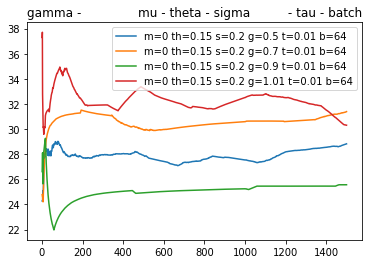

In [58]:
#reward with gamma parameter with reciprocal function reward: reward=1/(error+1) (runtime=5)
Image("plots/reward_reciproc_funct__gamma.png")

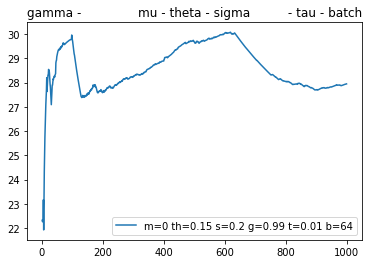

In [59]:
#5000 episodes with reciprocal function reward: reward=1/(error+1) (runtime=5)
Image("plots/reward_reciproc_funct_1000epi.png")

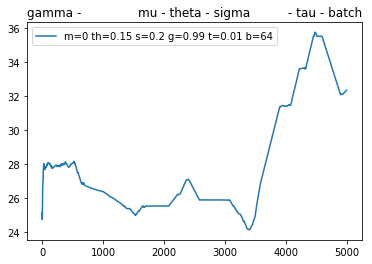

In [60]:
#1000 episodes with reciprocal function reward: reward=1/(error+1) (runtime=5)
Image("plots/reward_reciproc_funct_5000epi.png")

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:<br>
It may look like easy task to train the agent if model build correctly for that. Aslo I have noticed that diferent iterations may train differetly with the samwe model - rewards may drop low and stay there than jump at the end of episodes. For some iterations (more rare case) it may train gradually.<br>
All training progress was plotted and visualized to understand performance. Almost all learning iterations weren’t gradual. The curve usually goes down and then gradually improves. Used from 100 to 10000 episodes to experiment. In most cases for selected model 1000 – 1500 episodes are enough to train. Please see plots above.<br>
Agent performance after learning notably better than if no learning. Agent copter while acting with noise has minimal travel over x and y. When noise is off during the performance simulation the agent copter is stable along x, y. Agent copter however rotates around z axes (while howers). Please see corresponding graphs above.<br>
I did my best considerin timeframes of course and hope for your advice to make this project better.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: <br>
This was the hardest project in this course for me. I have suffered from lack of knowledge base and modest experience I had with things of similar kind. As a person who used to learn from template codes and real examples it was difficult for me to embrace algorithms, which were provided in couple of last lessons (Actor Critic model for example). I highly appreciate the examples provided in this course to scratch from, that allowed me to jump from and start over understanding things.<br><br>

Project Outro:<br>
I am passionate programmer and robotics developer that has ‘False’ high education for this passion. And now with the help of this course and stellar mentors/reviewers I have started learning a lot to teach my robots to do smart things. This project was one of the most challenging and amazing projects I ever had.<br>
Now I need more practicing to continue to implement my ideas and run couple of startups – because having idea on how things work – it means having an idea on how to invent new beautiful things!